In [1]:
import os
from io import StringIO
from collections import defaultdict

import pandas as pd
from tqdm import tqdm
import IPython

import numpy as np

%matplotlib inline

In [2]:
cxt = []
with open('data/NCPPolicies_context_20200301.csv', 'r', encoding='utf-8') as f:
    for line in f:
        cxt.append(line.replace('\t', '|!', 1))
cxt = '\n'.join(cxt)
df_cxt_all = pd.read_csv(StringIO(cxt), delimiter='\|!', error_bad_lines=False)
df_cxt = df_cxt_all.drop_duplicates(subset=['text'])
df_cxt

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


docid  \
0     edd1413c78e534afb136f36fdc9c9a00   
1     230b6fc2a40937f9adf45ea97abad846   
2     8bab952dfa1a367da1b8e7ad864d766b   
3     ccc5129a465d312b9528b0b04aa4399e   
4     eb04c2ada51a3161b8477de607721c64   
5     901e0896408237b398cf13543170fd7b   
6     a84ad5c0fc7d3755926ec5bf2b2d9dae   
7     a4c5052b84643fcba77ba4fd2e8da811   
8     976af8941a4e3e218a31e98fa76a42b8   
9     319e33a428ba3f83aa410b1bacbce7c7   
10    99ad086e719539ed98a662ecf391f10f   
11    f5c83eb87f183083a4957555b05c4ead   
12    04c987b9bd5e30e88615c69957ead487   
13    5ee6d93bd42a3fda9be81c481a23a8a1   
14    4f0239d5d8fb33558770d6a042d5b391   
15    3fd6b4506e703694a3996e52a6efad2b   
16    7ba5e0638f3f3cbfb4ce9efae778db71   
17    f0d16de6d41d3f8dad97dcf77cce0155   
18    688c8957fdbc3f54a9b34285a6936ee3   
19    b00e2026d2dd39de8af5440efce30e31   
20    acaf2964128a3d308243f25cd23e7318   
21    ed79c0f55bac3aa9aee9c09b6d3b4f19   
22    968e79715f483305972b817e6e2aff93   
23    68656e2c579634f6b59b831b1667c288   
24    3285f224b22c38c483faa0911bfd86b8   
25    8e006dc77cda3b639e6a6b3a86e02466   
26    082105b260e63b6197145a6ec8c9f15b   
27    a47a0e211f0e3c0994649cdefe2e47c8   
28    de3686ac6e27362d90aa2bbc72bc07b4   
29    1ba18f69e9663f3f9dc625b5a7483b76   
...                                ...   
8898  27c7873db24a3ea1a29dcbf9dd633c62   
8899  8f29f391bd403cb5b60555cf8fa756f4   
8900  9790ede0d39e33ef831eee697cdaac17   
8901  ff448c41e4be34528d4d9392161d4224   
8903  bc2e70024a203ca0a343825145ddb703   
8904  a9f87fa0e85d3bc3bc6d7d5eac82c230   
8905  f96b8f519b94345d9c59d15a97f9a795   
8906  06a73a0ee1c83169b7f1b275640cceb3   
8907  c430472ef62538a29db9c5e94b249140   
8908  a1a93c4f046a37cb9e2d734bca7da0e0   
8909  0424781a80223074b572dca0b019b970   
8910  0045268c16353544aa50fba63fac2581   
8911  843a9c35d49a3222868533048b06504c   
8912  b7cfd7b49f9d3a68b2d1551b1955b2ec   
8916  dc043e7b957a39878522948e546cfcd0   
8917  f74fa92851643dc49b18ec148699a8ee   
8918  7c9e23c63efa351a9c9b0ada26b25f63   
8919  54a4cfb5911633a1bcf8728f604d1b15   
8920  ffc2b9dea70e3ac59e5b33b9f9b247c6   
8921  c02d32ae80b331c69ffc4226f49bde8f   
8922  1f247ac6837634f2bc6652321c7e124b   
8923  1eef30ec56113eb3bc1a2884c398164c   
8924  624ef0645e713a3387e7c02aff3057ed   
8925  1e90a20e10ee35198f04621a1dce7470   
8926  131355ed331635a8b353cff72c7b161c   
8927  25b07b8854e130bd854731c9773eb678   
8928  f48bfeaccd8e3df8aff115eadb956bfb   
8929  0143034a905131c2b70495fc176a5a22   
8930  0351f7fea41d3f78b8e5fe5cee6e4501   
8931  1aca7fffb59d3ae8aa3181f6dcff61e4   

                                                   text  
0     福建：6部门联合出台暖企措施支持复工稳岗 为解决企业复产的用工困难，经省政府同意，省人社厅、...  
1     化龙桥站至李家坪站区间隧道贯通 12月30日，施工人员在重庆轨道交通九号线一期工程化龙桥站至...  
2     吉林多措并举保民生  2月18日，省政府新闻办围绕就业和医疗保障等民生问题召开新闻发布会。省...  
3     山西加快推进口罩生产供应 新冠肺炎疫情发生后，我省积极督促企业扩产、转产、增产医疗防护物资。...  
4     广东：暖企添动力 扩产有信心 2月18日，位于番禺汽车城的广汽新能源，机器人不断挥舞着手臂，...  
5     青海加快信息化建设 支撑“放管服”改革 近日，我省开展了市场监管系统市场主体登记数据质量建设...  
6     重庆出台援企稳岗返还政策 2月16日，记者从市人力社保局获悉，为切实减轻中小企业负担，充分发...  
7     云南：各地积极组织企业复工复产 连日来，我省各地在确保疫情防控措施到位的基础上，积极组织当地...  
8     辽宁智慧助力科技战“疫” 紧急启动两批攻关项目，多项科研工作取得进展 辽宁智慧助力科技战“疫...  
9     河北：全力保障食盐、农资、居民生活必需品供应 省供销社充分发挥组织体系和经营服务网络优势 全...  
10    安徽支持省属企业打好疫情防控阻击战 记者日前从省国资委获悉，为鼓励支持广大省属企业在疫情防控...  
11    吉林省公安户政部门：推出系列 为积极应对新冠肺炎疫情，1月24日以来，全省户政管理部门和公安...  
12    浙江：全省各地“健康码”陆续上线 以大数据赋能精密智控。连日来，“健康码”正在我省各地推广，...  
13    关于深入优化京津口岸营商环境进一步促进跨境贸易便利化若干措施的公告 关于深入优化京津口岸营商...  
14    浙江率先实现健康码全覆盖 杭州在全国率先推出健康码之后，这一通行方式被迅速扩展到全省。截至2...  
15    山西省建立疫情防控建设项目环评审批“绿色通道” 近日，省生态环境厅出台《关于切实做好疫情防控...  
16    福建：七举措推行“不见面”审批 省发改委日前下发通知，提出七条举措做好疫情防控期间投资项目远...  
17    河北2座水电站成为国家绿色小水电示范电站 河北2座水电站成为国家绿色小水电示范电站 至此，全...  
18    吉林“互联网+公安”综合服务平台推出新冠肺炎密切接触者线上检测 为积极应对和阻击新冠肺炎疫情...  
19    关于拟批准成立北京市通州区德道职业技能培训学校的公示 依据《中华人民共和国民办教育促进法》、...  
20    关于延期使用部分小客车指标的通告     根据目前本市新型冠状病毒疫情防控和市民生产、生活实...  
21    关于第六次北京市农业产业化重点龙头企业 认定合格名单的公示 各有关单位： 　　根据《北京市农...  
22    北京市市场监督管理局关于在疫情防控期间提倡网上办理登记注册事项的倡议书 为全面加强疫情防控，...  
23    湖北省为企业防疫提供法律服务指引 企业能否向社会公众募集慈善

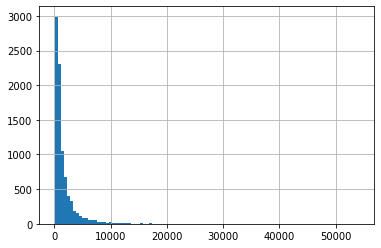

In [3]:
df_cxt.text.str.len().hist(bins=100)

In [4]:
df_cxt.text.str.len().describe()

count     8761.000000
mean      1638.467412
std       2537.454257
min         38.000000
25%        454.000000
50%        856.000000
75%       1817.000000
max      54169.000000
Name: text, dtype: float64

In [5]:
df_cxt[df_cxt['text'].str.len() > 5000]

docid  \
57    62d647c1520c3596ac43ec434583c251   
279   6ca6fc00abac37f687e593f6c00944d3   
602   29b353aadeec38fb939448229d4bf83a   
658   388eb40e85093001844a9531f349d846   
695   9d90cd2f047b33b18bf121b77e9e6f64   
753   6b9f3b78bab0359992532c7196124466   
857   612d4d7e71aa32f9b0bfa07f7835ee64   
940   693cca9834473d99839f474fa6b149e6   
977   51f9b4cf25c2309997a1df5a459717f1   
983   d5e8751d804e31278378e45403a956f9   
986   0bc737203b223c10b21d6b2b40586eee   
1015  9d66539838a43b9ab766e2f25a54c16b   
1063  a0b32d007afd32dfadc9797e47766f60   
1078  951903df1955371cb22e09e991f75473   
1086  660af8ed344136dba5d5cc31ab5b5527   
1101  ee021692884d315faa8ccfd0d4556e01   
1117  7f12c9a4fd403fc2ba01cc21631eaf08   
1132  6c0611d2c5dd3179b9b3591313eca03c   
1139  791e8fa835ef3c29b3aed7e5416512fc   
1154  81c38f8f00353db0a0ab4a95e00a2fb7   
1163  3a051e50f98437f282fb52c9c621bca2   
1165  b5762211c3083e70af1b3935158cc548   
1166  7ac6f51d851330b68e330ee682ff7f41   
1182  d0a1aed8739933b4bb8fbc4910d2fd79   
1188  df87de9cb2893da4812bf8815ec2004a   
1211  d6ed0ebad3283517853086d2de77397c   
1229  2edcc07a890738f8a1d08db7898051ef   
1236  86ff00ff30993c8da166c0abf4b0087b   
1237  584d8658d401334791ca943aa1ea06f4   
1248  d0a6f26c196d39969bd8e7b23544b5b1   
...                                ...   
8408  22e1f65934c534669261f7732ba478ae   
8415  eb2fa8e6d2bc3d51b1c6d90f0cb6bccd   
8416  41cd9743f1183643b2352c9ba2b95b03   
8417  0d5370b264ed3aad80b1550b42264f04   
8431  8b61f1fa43c8327cb35d371f855dc031   
8462  6e9cc5fc93203b399f88ba828154b457   
8464  5faa7aa6a959363f8f0360d6c98531d3   
8479  18991e3198643254897eccfb7edaf924   
8519  7990c8829d4d3f8f8d0a8a87e5e0ae59   
8555  7c3c46c4a0d13152ae073786ab3be5e5   
8605  39e9a4a5cb0637fd84e89d1b03f081db   
8615  68fb5865ad253b50be67374d6ab709b0   
8624  403f1f877661308da16a35e6a9fab5ab   
8640  62cd5071808c3140bb3a1a7a38796827   
8642  7a337b88c73833ac99cc5f67043415c4   
8647  e49dbe55acba376196d15d1b6d57c224   
8648  9ab68c61ef12374b97b542cb01c43583   
8660  62ab90d7a379310d9e9857c2a238117c   
8669  890f55befcb839c9a52180c320a781ef   
8672  5793b54528d43436ab72c0a7d59e7c03   
8684  f780787080b7329d8aeab39a35bf1a15   
8690  1f464c4c695438fab50b62723cd9f1de   
8705  db1a7722ff9934f49a6066bf71ccb7fd   
8738  6672e4e46275346fae583c82311d83e9   
8795  8e501fb921673d38b3ab517b58bd5349   
8814  5e95b343350937859b7daa073e0b0a4d   
8820  18b3b6ba7bcb31668f15b880db67b8d9   
8866  32120800db5234eda3e317957b259ad7   
8903  bc2e70024a203ca0a343825145ddb703   
8918  7c9e23c63efa351a9c9b0ada26b25f63   

                                                   text  
57    北京市人民政府办公厅关于印发《2020年北京市交通综合治理行动计划》的通知 北京市人民政府办...  
279   “非接触式”网上办税清单及问题解答 为深入贯彻习近平总书记关于新冠肺炎疫情防控的一系列重要指...  
602   新闻办就首批国家农业高新技术产业示范区建设发展有关情况举行发布会 国新办就首批国家农业高新技...  
658   坚决歼灭最后的贫困堡垒——写在决胜脱贫攻坚战开年之际 新华社北京1月3日电 题：坚决歼灭最后...  
695   工业和信息化部举行发布会介绍疫情防控医疗物资保障情况 2月2日，工业和信息化部在京举行新闻发...  
753   各地国资国企齐发力 合力打赢疫情防控阻击战 连日来，面对新型冠状病毒感染肺炎疫情，党中央高度...  
857   人力资源社会保障部召开发布会 介绍2019年就业和社会保障等工作情况 人力资源和社会保障部于...  
940   北京市人民代表大会常务委员会关于依法防控新型冠状病毒感染肺炎疫情 坚决打赢疫情防控阻击战的决...  
977   北京市民政局关于北京市2019年度市级社会组织评估结果的公告 京民社发〔2019〕193号 ...  
983   关于发布2019年度北京市星级养老机构名单的公告 根据民政部《关于加快建立全国统一养老机构等...  
986   关于印发《北京市全面推开行业协会商会与行政机关脱钩改革工作方案》的通知           ...  
1015  转发国家发展改革委办公厅关于积极应对疫情创新做好招投标工作保障经济平稳运行文件的通知 各有关...  
1063  北京市发展和改革委员会2019年度法治政府建设情况报告 2019年，为全面贯彻落实国家和本市...  
1078  工业和信息化部关于印发贯彻落实《法治政府建设实施纲要（2015-2020年）》实施方案的通知...  
1086  门头沟区人力社保局应对新型冠状病毒感染的肺炎疫情影响支持中小微企业发展服务包 为贯彻落实《北...  
1101  中共中央办公厅 国务院办公厅印发《关于深化新时代教育督导体制机制改革的意见》 教育督导是教育...  
1117  农业农村部 中央网络安全和信息化委员会办公室关于印发《数字农业农村发展规划（2019-202...  
1132  工业和信息化部关于印发《应急产业培育与发展行动计划（2017－2019年）》的通知工信部运行...  
1139  国务院关于促进创业投资持续健康发展的若干意见 国发〔2016〕53号 各省、自治区、直辖市人...  
1154  市发展改革委2019年度绩效任务全年完成情况 1实施新一轮城市南部地区加快发展行动计划，加快...  
1163  关于进一步强化金融支持防控新型冠状病毒感染肺炎疫情的通知 【颁布时间】：2020-02-01...  
1165  北京市人民政府办公厅印发《关于推进城市安全发展的实施意见》的通知 京政办发〔2019〕17号...  
1166  北京市人民政府关于印发2020年市政府工作报告重点工作分工方案的通知 京政发〔2020〕1号...  
1182  北京市东城区人民政府办公室关于落实进一步支持打好新型冠状病毒

In [6]:
df_cxt[df_cxt['text'].str.len() > 5000]['text'].iloc[0].split('  ')

['北京市人民政府办公厅关于印发《2020年北京市交通综合治理行动计划》的通知 北京市人民政府办公厅关于印发《2020年北京市交通综合治理行动计划》的通知 京政办发〔2020〕6号 各区人民政府，市政府各委、办、局，各市属机构： 《2020年北京市交通综合治理行动计划》已经市政府同意，现印发给你们，请结合实际认真贯彻执行。 北京市人民政府办公厅 2020年2月3日 2020年北京市交通综合治理行动计划 为推动本市交通综合治理取得新成效，营造良好出行环境，特制定本行动计划。 一、总体思路 以习近平新时代中国特色社会主义思想为指导，全面贯彻党的十九大和十九届二中、三中、四中全会精神，坚持以人为本，以“交通秩序专项整治年”为抓手，按照“优供、控需、强治”总体思路，坚持“慢行优先、公交优先、绿色优先”理念，加大精治、共治、法治力度，加快构建综合、绿色、安全、智能的立体化、现代化城市交通系统，实现中心城区绿色出行比例提高到75%，路网交通指数控制在5.6左右，持续提升首都交通综合治理能力和治理水平。 二、重点工作任务 (一)优化供给，不断提升城市交通服务能力 1.加快轨道交通线网建设。加快轨道交通房山线北延、16号线中段建设，确保2021年通车；推进11号线西段、3号线、12号线、17号线等16条在施线路建设，确保完成年度建设任务；实现13号线拆分工程开工建设。(责任单位：市重大项目办、市交通委、各有关区政府) 2.推动市郊铁路建设运营。实现市郊铁路怀密线引入北京北站，建成城市副中心线西延和京承线(顺义-怀柔北、密云北段)；推动京张高铁同步服务沿线通勤客流；推进清河火车站、丰台火车站与城市轨道交通便捷换乘；推进北京西站、清河火车站与城市轨道交通安检互认。(责任单位：中国铁路北京局集团有限公司、市发展改革委、市公安局、市交通委、各有关区政府) 3.加快轨道交通既有线路提升改造。组织落实轨道交通未开通车站和出入口的启用实施工作方案；开工改造1号线福寿岭站，完成宣武门站换乘通道改造，开工建设国贸站换乘通道改造；提升6号线运营速度。(责任单位：市重大项目办、市交通委、市发展改革委、市规划自然资源委、市园林绿化局、各有关区政府) 4.持续优化公交线网。优化调整公交线路80条，改造提升BRT通道，建设干线、普线、微循环线三级公交线网体系；新增施划公交专用道48公里；力争高峰时段公交车与小

In [7]:
df_train = pd.read_csv('data/NCPPolicies_train_20200301.csv', delimiter='\t').drop_duplicates(subset=['question', 'answer'])
df_train

id                             docid  \
0     47a41a03966431739257ef215cdc1caa  015758c216923f89991ca61c67b29f70   
1     17f3894afaba3f24a3ccd550fe442177  356fb8b804d73c3bab18472c36e67a3f   
2     5f1c9eee4e5a302599f2c5baf674d05a  6488f3b3332b3995a4c60c7e3e3e9993   
3     8b85325949b73adc8a91fe7276673ac4  5e996fbd63c83563985bd24222b4a148   
4     c9e25cd4650d36f488811f65e6ab9a84  99c5f444f76c33589d600d7e8f487067   
5     7721da4299f5337fbcf34eb59cdc43a9  f3bdcc0013733fb7a6a7f37549bb5e62   
6     380320b7ece133dcae5c2aa6718cba93  34aeec4d64c1367ea48d5c0d64b5054d   
7     7dae4c8341543e5b938efe7d9d8c4e5f  902851584a273dab8694f951d2a75718   
8     2a1e5bd12d213e83b3ef15c19876d259  2ba59a4e39cf329cbe0d54a97f6b4371   
9     5f500a46c2963358a9300c7fc048576a  d368c8a306c03cdb8534ddf4c5206f69   
10    16b284f66acd315bb90badb4786fbfcb  2224dc162e2831f693b41749dd361b17   
11    7d42bed4e804370ba62f44ff0a7a9371  8938370855d438d09e117cd3167bc843   
12    66141a935c6733119af885c77a227f6d  4262b3f6696f3694938c678b119a1350   
13    5765431d645f3d1c9690381751a37cab  91a09cd035a2382c9907cddc19ebc677   
14    e6b3f774cfca36788219352069619797  e4c461ce0eaf3dae82e48fa1750d38b5   
15    8c91f674de77313f98ed410d9eccb4f4  fa00e87358973952ad1ce59a7be6c303   
16    b5db0fcf7ebf3b38952f6ad0191ad96c  827a7f0497573965910a5ad55d943dcf   
17    a234b95528c8323ab87cb2f625fb1d15  4777e4789a74371ea031d19280c32421   
18    5d0f24b171783bc4becb8a6bcfb0098a  a302334afe223e6ebd2a4577dd914847   
19    5605ddcb8c96394d88fc32ed84140378  77ed9ce9a3123f1e8cd8f85f7769fcd2   
20    26f02067bd2130ac935321b34463bc1c  ef97d270e4313825aefdad050cc6e4e9   
21    cbe940e0e0c1394182cc4965bbf1cfe0  fab5139b3e55354a910059d0f71292ee   
22    7f1fb11491193ffaa2557d1e7ad5e5cc  8c4baaeceaa93a1d9d3b9ba54fa1a957   
23    fa894810002439f0b49d6bb4951b4446  34196184a3d234bca3386e50deec2f88   
24    d569c06d2710391991852ca5423ad504  4052555c179f3d87b2deca68e7e17a3d   
25    fbe1bcc20561334d8e65fe3af1b343c9  1aca7fffb59d3ae8aa3181f6dcff61e4   
26    fb5b09d4583239038d85cbe077dff1a3  e52b842ab4493d3db086a5433ec32f26   
27    0c3dfb68fed2312e87ef75e7cb196ba2  bf5232d58acd3bcc8eec1b3fe44685e7   
28    a7af0d67f5a232e6afbc7059dbf84d24  b2a1ec806fcf338ea25158dc89c7b530   
29    50f75d419c5136aeb2d16a767d5c8579  f48bfeaccd8e3df8aff115eadb956bfb   
...                                ...                               ...   
4970  52d50bdc3b053b999ef42791549a4f0a  7470a3ebc47b3db4b24b1104350069f7   
4971  55ce1a2b8f8030df95708526eb8a961c  3a0a691c7959390cbc6306d51cda3b6d   
4972  0fb7096fc8a93486a0c3b7a1c4b590c0  0fe65b9b380e31a38255039f9965b172   
4973  096253822bad389cbbb34b1f83aae8bd  aec738bbd7a730ef9b0f06ac32b09cce   
4974  1c2683e5922232b4b2509e4a8483eb7e  cc9cf386585f3dcda7a3491aa31bc66e   
4975  ee75d2d3eea43e0f8c79bd1b4cdee037  60607e727dae39699d2295e4eae15772   
4976  58e379610999314eb95dd5704ae0588f  113dd14bf319326c935ad7efc42e9c77   
4977  41feb27e3f173411a3f70cc5d659953a  3d9a8349bdf33e188be0e01c91c980d5   
4978  c216607e4dc231cd882d69e894486d52  7ac7f64008303886ae82c0700bff8914   
4979  8a8340ae77513d089e49352091be3f8a  fc1a4628f25331cb83c898369675edb6   
4980  9317ce7782b93c0d87b0c4a3c968d8a2  48a677c4d45e3cb4bf57e45afb599d2b   
4981  8ee2e1b0a41f32ae8d0d688a213bd14b  a5e34fbcf749354c90e8a07b97923758   
4982  f26b3bb1bb8335aeaea0f3f122b36c95  f63b1d4c8e9a3808af9f1a744fae5ef6   
4983  f896298f70b63fd5aeb39b6aca7d2b62  04c3a9152b2034a5a29740630908a3de   
4984  b16ac4785a63302d9874e079df4784c2  bdee45a53ac03acb93277c6431ff4d13   
4985  d30b40d920e93b6b80758685b13667c3  647e9c1b71723e65a21533ebc0acfe05   
4986  5eee9290d4663af88788106f9b92e21d  b9e391a83d033ebe80bab1b2c0d04aad   
4987  81e0cdf55f3f3d5aba045a1a0ee31cc2  4e7320569fe23c3f9bca64d704ec7326   
4988  95a635f84cfc388a83bb3000f70c3aca  9b4361a3d9d2391684e7e40fcc8910b4   
4989  fbf256e1cc233201b85e75592df70ef5  ffc2b9dea70e3ac59e5b33b9f9b247c6   
4990  5f49bdf6fad23622962ffe6f5157638e  b9e0d19466a43a42aa996a4b5f9bc0dc   
4991  6b

In [8]:
df_test = pd.read_csv('data/NCPPolicies_test.csv', delimiter='\t')
df_test

id  \
0     0ce5c44a54d63a5b9b7c9657d1919fc7   
1     0e72999704f430d8aa5f1233d71bf0cb   
2     0f17f97f38fb3174ab58acda1f1c3ff7   
3     c0c35634fdb83a40884fadebb0e82ff7   
4     0caca9df37d5388f97ef351eb98cc58a   
5     bd0e4148938333729e152ed01bf2640f   
6     0d335cafbf3a33dc924f17bfd2cb6383   
7     e0f54daebfb73bb690f3f0274b8fc843   
8     f0c4109f95af38929cf38cf4411eac1a   
9     0f9250b1ff9f32a28189ffdfc62a2dc9   
10    0d6e16a184213fa68c6790e5dd0f9813   
11    e0b69a64858733da86412649339d958f   
12    0e96ea5396e7377389a88f6233ea8037   
13    0ad2d8b939163fbfb8d73c2fa64cb714   
14    ece0f74dad3933f0af1fdf19a64ac023   
15    0f5d9ade51123aecba1aaab3d92bad5d   
16    0d3d1f021b0731dab01805c73a3866b2   
17    d0e18aba42453538995aeed8ba11bcb0   
18    c0af116827c537428b976cd529dcfd92   
19    ba0c4dc88ed43ef5a6f9303fd5d17a78   
20    0b9fedc8da9d3aed8da3aa6894a5d4fd   
21    0ff281d0409c30c1b6744b2eb5cf4723   
22    d0f4a969eaec340a819035cb21f8dc11   
23    ae0c442fb44c3cfbb61386b3a429e43d   
24    0c315f7a1ea2357fa677196d9a6e9743   
25    0f2b4ceb316a336996a8544ba031bc68   
26    c0ae20ab25193b5d8dd3d53cbe2c85a2   
27    b0e3aa5637d533f084f2cc4e3df76625   
28    0c24f4d4aea8327aac47ea8a58ca3568   
29    00ffb393d0063cb39bfc7e63c46cf65a   
...                                ...   
1613  df6e9628423a355389aecfac9964a357   
1614  8e550193c0553da3812f8c1094ce1dbb   
1615  8e9586cf6dbb357190ca48d82f5b82e9   
1616  905308493e6039d990544d133ff0078d   
1617  de4e01039cae3e66adb51a0e869e4088   
1618  7645e72003023b99a4c182758d8be335   
1619  cf053210911e381eaec5a9bdb6cf6241   
1620  7e1498ce386c341db5b39ac31987d705   
1621  c209e590ab11318eaa4f0120ebe5262f   
1622  39784431029e332bb0fb7d22d2c87cd5   
1623  5764898e00853fef9c9c7a02047f0879   
1624  c31e0646cfcb3b3aa82ac20026b3b49d   
1625  dd8e9031ab213335a6b37c460dcb7e56   
1626  d32e545b75433148acf805f0fd2998b5   
1627  d462e794ace93c1abb03a38d33fcdee0   
1628  e3e43946a5de332d83f97c771d61b449   
1629  a5819e96760c3e868511402e23b66757   
1630  d5e6242ff42a385693187076e3adc8b4   
1631  f983e74766a63b2a9ba35d31ec81f12e   
1632  aa2e9620db51393aafff7854fde7980d   
1633  91e463fdb97433a39d274dba98dbb5ee   
1634  cfe211111e563191973fe9a5bac146f0   
1635  2e103113ffe73292a4e35190071d32f5   
1636  1e92666267e130109e54823f0f67487f   
1637  2e90619a772439588a975e9078d35aa0   
1638  53e0719047fc3326963a10a48bd924d4   
1639  a27e530350ed33438a34f675f0fc461a   
1640  e4e75261297f3a49b0b7679920ba68a8   
1641  345641e320da302b8b5e39cdb2b003a9   
1642  be906e22443a37bca5f4db6ba461d899   

                                               question  
0                            天津市继续教育网在“抗疫知识专栏”中设有哪两类课程？  
1                                   北京市提供的优惠政策针对哪些重点企业？  
2                                  泉州市对举报违规餐饮店的举报人有何奖励？  
3                          为保证疫情期间食品供应，广州市多少家商户上了饿了吗平台？  
4                在北京市法律援助中心服务大厅开始对外提供法律咨询之前，如何获得法律咨询服务？  
5                         广州人力资源服务机构为五类企业成功介绍员工的给予多少补助？  
6                                 上海普陀区企业在哪里线上登记员工健康信息？  
7                           救助机构通过什么方式对于生活无着的流浪乞讨人员来救助？  
8                      截至2月4日，北京东城区向湖北十堰市郧阳区拨付多少财政援助资金？  
9                                      青海西宁平价供应的蔬菜有哪6种？  
10                                 四川对居民个人提出了哪些要求来防控疫情？  
11                          福州市政府为福州市重点企业稳定生产开通了哪些绿色通道？  
12                                       西安市如何健全服务联系机制？  
13                              交通运输部在《方案》中将哪些列为关键控制指标？  
14                              浙江如何保障生活保供类电商及快递企业正常运行？  
15                       安徽省在疫情防控期间新增就业岗位的小微企业给予什么政策支持？  
16                           上海防疫物资生产企业，符合条件的企业贷款利率是多少？  
17                               河南省通过哪些途径平抑生活必需品价格等问题？  
18    “创客北京2020”中小企业创新创业大赛中设立“疫情防控”专题赛参赛者通过网络进行注册报名，...  
19                       南昌市出台了哪些政策来支持疫情防控物资和生活必需品生产企业？  
20                                       浙江对企业复工时间有何要求？  
21                                      武汉市紧急征集了多少台出租车？  
22                                 新疆维吾尔自治区微信公众号捐赠如何操作？  
23                      兰州海关在哪里设立进口防控物资

In [9]:
df_train_cxt = pd.merge(df_train, df_cxt_all, on='docid', how='left')
df_train_cxt['text'].str.len().describe()

count     4964.000000
mean      1518.065874
std       1632.737306
min        115.000000
25%        604.000000
50%        981.500000
75%       1853.000000
max      18319.000000
Name: text, dtype: float64

In [10]:
df_cxt['text'].str.len().quantile(0.95)

5580.0

In [11]:
loc = []
for row in df_train_cxt.itertuples():
    loc.append(row.text.find(row.answer))
pd.Series(loc).describe()

count     4964.000000
mean       540.535858
std        642.815919
min         -1.000000
25%        188.000000
50%        368.000000
75%        674.000000
max      14491.000000
dtype: float64

In [12]:
df_train_cxt[df_train_cxt['text'].str.len() > 5000]

id                             docid  \
41    572e8ac38550381ab7df23d94bd4b859  c12467d90b333d618611b9e766bc03ae   
90    8acfb57e76113707a5ca300eec5c7d1b  8b12df735dcc37d7b19b3f5c3df32cab   
104   7c92e97763583881a96502100f697489  b771d198ddb63778898f16c9351dea3c   
184   bd628b334bed374884f2d4a3accac2cb  6a93bab757d53aaa94b7717b4e509060   
247   40b1da12e5f13f79b6dac1b964d6036a  c12467d90b333d618611b9e766bc03ae   
263   e1974adf72bd355680943dda6463f7f0  d898435a903c3865ab91e76966d31909   
304   e40f1b3dfdd13061bec3e7f63e347d55  a7bde7d661fb397ea6a081840f936950   
316   317f2377f0df37d7985b3de658d103d4  ee07053e6feb32c5a2cd6bb261e5954f   
362   47ef8c7482de339ca422145b67889438  e67257bfc4f83c22b75d6d04c1716ad9   
388   0c7f69377f0637d39632d0b89a8318b7  6cf4628ffef130e1bbfe76eee0071c85   
389   21a32fe178ca3cfb9b47ddb6fc51356b  e67257bfc4f83c22b75d6d04c1716ad9   
418   b088f632974838b6aaa5a65885b2a88c  e19829fe62143601888f0f1c77cf2711   
421   19ffa6cf214b359d8a8c29a977f216a7  bc854affe61a380c976788dbd4e64a85   
433   eb23769dfa9c3474abfae9211462c48b  bb18641edded32c88bc5698dce135f6d   
434   aff0b940e660379fb250e69287b34527  983984f7473f37928df3f0189fec95b0   
439   3b3ca8faa6e4371ebf18b953a73e6a17  39e9a4a5cb0637fd84e89d1b03f081db   
441   938e8d28e0d531e6aaf40b437e623ede  5efb2c358f6d3b97a5e1969a108fe71d   
457   b97d3e4851f4317ca715e8cce3c10e0e  d898435a903c3865ab91e76966d31909   
486   c9ef96216c903fd1a773713815dd8c5e  56cbd85e41543dd3a9a9ebfaf409f1a3   
496   36572543b25b382f9c751508e5be43df  ddbcec7a74dc3fb290548cb26df959db   
529   66579ab3d6a232f9991f44b1de131da8  292cbef39ef43c3baa89288c9df27192   
568   8ba550991fa239f7a60f95e4d00fc576  bc2e70024a203ca0a343825145ddb703   
594   83036e92ab383d459ccd78df1710f864  eee536823bda3e07805f6963b42bffb3   
629   b61223a5dac43f48a3a8a1830d71181f  96b6081881af3fc5bea47044ef4509fd   
659   c6ffb12cbdaa3342b91bda9c77a4c674  32120800db5234eda3e317957b259ad7   
701   2299f2f748c63ca29092a589fad2e2ca  3a07ee0f8ac83884a2b32baeaec79ac0   
713   6099d541dfd9365abc4c7892e8c72650  bc582b52fc973499bb8f0c9cac9fd422   
715   8f62d285a5d93efeb7a93756a6908914  8da1fa446ca33598ab53f6c65c3be945   
723   115e5abdcc303f128a6e72c331e5b75e  fe324902fa1737759838098962a94033   
747   980b7976919c3eb8a0670b742a852735  22663b963c8336068e008ca25169e690   
...                                ...                               ...   
4265  40962a1b6dea3e0badc79aa06527a344  6a93bab757d53aaa94b7717b4e509060   
4370  8262f05a572b34b9a342b18917fca3f2  39e9a4a5cb0637fd84e89d1b03f081db   
4423  726812d237c936bca13c5d7350334ae3  bc2e70024a203ca0a343825145ddb703   
4434  eb8805edddfc357b8188d4a61ce86e18  8b12df735dcc37d7b19b3f5c3df32cab   
4444  305014716f1530098d5c5c29697a97f1  4ea328ec76da3a46967e134def0afb6a   
4469  d940da3fae0b31f09323150cd7c461e8  f2f31eb275b63adea4012690d601e14a   
4482  43b8f6c3d7153af2b65ac25a9a426bfa  e481d9ad8fee3d5ba048e074af8a584b   
4541  8755dbe0882530a9be363f1b588baa46  5440412a781a37ed920c004fa4057314   
4549  42ab385fcb093f3aaf516e0a2535a87c  292cbef39ef43c3baa89288c9df27192   
4577  96b6cc4aaf6a30229533ef329ca6c31f  bb54ad9c59b13e77b69b305fcb5e58f3   
4605  7e02674ee5c83003b0f1220b3b91f5dc  5e95b343350937859b7daa073e0b0a4d   
4614  1ebbfa31760c3c8f9d6114a65429dca3  46224ed38f9732978d1a99b7f0af00a9   
4618  637b815bde533e0597d264a2d4c986e9  408d3f6effe130bf85d7af70803216ae   
4633  35ed5fe0a87235c1973ba46d80d7c273  dcd88ff349473fa899455482dd54dcd4   
4648  1a1a9ccabdf63a709e176ae3469a8624  cc9cf386585f3dcda7a3491aa31bc66e   
4673  1babdff3ccb63374929226c372c6ab9b  8da1fa446ca33598ab53f6c65c3be945   
4676  8d06bec9046d3639bfffe98ad1400ebe  e19829fe62143601888f0f1c77cf2711   
4699  85e2e366c4e9389e90add46eeb1031fe  eee536823bda3e07805f6963b42bffb3   
4739  cb9a56a3c69536a694b3fe95ea76ba7f  7d6a65d36b5b3d5e927567a82bbfcaed   
4776  7aa43f47eab43cd88d690285249065de  00218f498eb733a6ade9c4682882eb3e   
4779  7febb0ecf7ef3a00bfba73c25805916b  657fa8db516930839318fce54b7026ce   
4802  69

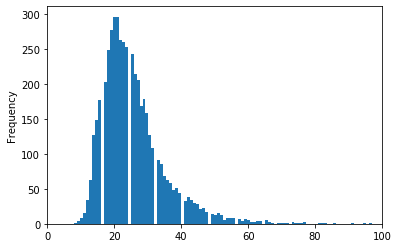

In [13]:
df_train['question'].str.len().plot.hist(bins=100, xlim=(0, 100))

In [14]:
df_train['question'].str.len().quantile(0.99)

59.0

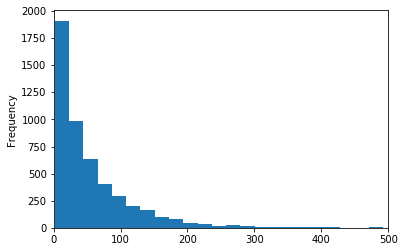

In [15]:
df_train['answer'].str.len().plot.hist(bins=100, xlim=(0, 500))

In [16]:
df_train['answer'].str.len().describe()

count    4964.000000
mean       58.181708
std        88.276990
min         2.000000
25%        13.000000
50%        35.000000
75%        74.000000
max      2132.000000
Name: answer, dtype: float64

In [17]:
df_train['answer'].str.len().quantile(0.99)

325.0

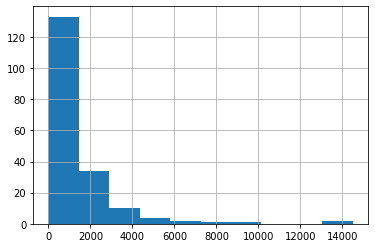

In [18]:
pd.Series(loc)[df_train_cxt['text'].str.len() > 5000].hist()

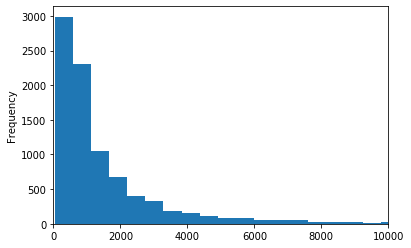

In [19]:
df_cxt['text'].str.len().plot.hist(bins=100, xlim=(0, 10000))

In [20]:
df_train[df_train['answer'].str.startswith('1.') & (df_train['answer'].str.len() > 10)]

id                             docid  \
25    fbe1bcc20561334d8e65fe3af1b343c9  1aca7fffb59d3ae8aa3181f6dcff61e4   
39    9293449ed37d3bc49ac6f6716eeccbc8  2ec70c304c6a3ddca4dbd717c3ae71fb   
214   7cfd432aafcd3f9ebbc5b2a3762e098e  c82874ede1983be9a806bf9cf6e7740f   
266   24daa49889983444a58bd60aa2464bf8  4b19b768c42f35368eb22fe249e7c4b9   
335   043b4175143f34a783be8666236d5c04  5996f53ac1ea3a7e9f81202d34d6e740   
486   c9ef96216c903fd1a773713815dd8c5e  56cbd85e41543dd3a9a9ebfaf409f1a3   
529   66579ab3d6a232f9991f44b1de131da8  292cbef39ef43c3baa89288c9df27192   
690   307c0fea21e030e28342cc250aeb4661  77348ea885e731ccbe7dcbdebbfcd8a9   
1049  d93489b6dd923ab98196f3b05f8c97f0  292cbef39ef43c3baa89288c9df27192   
1054  3552f8b14abc3a9d9a469482e342f069  758c28a528f23ad18fac342368f31333   
1168  4a6b0974796d30a8a52364c9ba87ba34  713886cca9dc346aa5a4000d202137f7   
1342  6bf0f238de5a33a886f2b6b8af94a49e  d998a067507d3701a9b0d073656e1060   
1751  bc8523ae39713aabbdeeec64b86010b0  292cbef39ef43c3baa89288c9df27192   
2104  adea8a5e38d6370294913df4205227ae  4f9000b974c53fe3a4fc3c90ba21252f   
2138  7e9463178e893c3a86c44c810d2eba4b  f48ec8e8f02c32e19c2342097a348558   
2221  00db57ce94ae36a38e84321230606b86  78f05bbf5a283e3e86da4bea6c1615b8   
2566  45564fbe4d1f39199e440b398b3f288f  089eb5e1b2a539519c624b3fb9b2cd2f   
2622  16ef9bfd485c3ec3ba3e9131a470eac2  a7bde7d661fb397ea6a081840f936950   
2623  7bd0f71896983df79d042215197bd755  74e38216442e3fcb8afca056e3f1ac26   
2643  b6d50082edfd34eca19a7cc370760476  8658892dedb534ce8dd36b2bdf1820a6   
2763  bb1c2396e1ed3bcdab6861545a75aa84  3ccfc87fe7983bc080810317fe823bee   
2957  c7502cf1a1ea3f23a7e77472294276e1  4b19b768c42f35368eb22fe249e7c4b9   
3244  d81e7c316a6c3340ab0ccbcb33280432  292cbef39ef43c3baa89288c9df27192   
3377  7de2a52839643544b48f39781d894ec2  21290d4085d231d49fed21876d6a95a9   
3468  52ae3810be843969aa5881793447eb2c  089eb5e1b2a539519c624b3fb9b2cd2f   
3653  1ab129a618213c09abf99561919f179c  303a5432b8b73f108f04134391d83d37   
3850  124497ef7ecd31268ca79a786f9fe7c6  8f4847d1f56636c9b988f8f8229ff342   
4173  43831aa5fd1c3796b3d39d79b058e181  98e8932f0bd33e8795a9e095f624e43b   
4380  1251ba8277033a018b890c86d9047010  a075e1bb4d2c37a5baa51825681a06f5   
4570  8755dbe0882530a9be363f1b588baa46  5440412a781a37ed920c004fa4057314   
4578  42ab385fcb093f3aaf516e0a2535a87c  292cbef39ef43c3baa89288c9df27192   
4679  1a1a9ccabdf63a709e176ae3469a8624  cc9cf386585f3dcda7a3491aa31bc66e   
4761  57736e4d7ccb3d99a805f63dd7e9e399  732a1cdc5d2a3b53b6eec8237359de1d   

                                           question  \
25                          广西壮族自治区红十字会接收捐款账户信息是什么？   
39                 北京“抗击新型冠状病毒感染的肺炎疫情”募捐行动的捐赠方式有哪些？   
214                    北京市中小微企业办理停征污水处理费需要提交哪些申请材料？   
266                          北京市对施工现场的疑似人员的处置流程是什么？   
335                     福州市推出了哪些金融政策帮助体企业稳定生产、保障供应？   
486                             企业申请土地使用税困难减免的流程包括？   
529                                  北京市项目复工后的消毒原则？   
690                    铜川市决定2月17日恢复运营的公交线路及运营时间是什么？   
1049                       北京市项目复工后出现疑似病例应采取哪些防控措施？   
1054                      关于北京中小微企业稳定就业岗位政策能享受哪些补贴？   
1168                              北京对中关村各企业有哪些支持措施？   
1342                              哪些情形构成抗拒疫情防控措施犯罪？   
1751                             北京市项目复工前需要做哪些防控准备？   
2104                  泰州市海陵区发出通告，疫情信息有奖举报的范围及内容是什么？   
2138                          宁国市对农村客运班线乘车要求做了哪些规定？   
2221                              北京市公园管理中心对人员上岗要求？   
2566                                  高风险暴露人员包括哪些人？   
2622                      北京市对各施工企业的劳务人员招录的具体要求是什么？   
2623  北京市参与新型冠状病毒肺炎疫情防控工作的市属国有企业申请减免租金补助资金需要准备哪些材料？   
2643                        北京市施工现场人员实名制管理的具体要求是什么？   
2763                      贵州省税务局为支持防护救治提供了哪些税费优惠政策？   
2957                          北京市对施工现场确诊人员的处理流程是什么？   
3244                             北京市项目复工后需要做哪些防控工作？   
3377                            江西省云课堂培训活动的培训内容是什么？   
3468                                  低风险暴露人员包括哪些人？   
3653                 

In [21]:
from sklearn.model_selection import train_test_split
train_set, val_set = train_test_split(pd.merge(df_train, df_cxt_all, on='docid', how='left'), test_size=0.1, random_state=42)
val_set

id                             docid  \
4549  42ab385fcb093f3aaf516e0a2535a87c  292cbef39ef43c3baa89288c9df27192   
393   8e54ffa07e013a4d9eb9bae452ec4306  e74b323c4946398590279d4f474ee738   
1164  38150242dcc63085948d031fdb16cb71  1e579ca9544a3cb9ab7d21332f9a8a9d   
4331  e476613cde7c3f39a9cf0eb30e305aed  e81f12b9f99c3e82ad358c90a52d3e13   
731   145e3de20a4c3505b38c2981b22db9d2  fb03a2bf6a5f3f95bd7df18e5304219b   
3119  542e67cb6c3e323d9f7901ba68fb00fa  33ddd81164f63d4cbba1603168a1a2d2   
3138  9ecb9abec446342cb520fca11d91e8a0  b0f34080da2d381784b37bb5f155dcb9   
1149  ab0b7a071e4e3aaebec8e50bfa484e37  3208a98211b5320dbe979f6d6f4e0add   
151   fb64b46df24a372ebe63844eb9a63d1a  585db14147a1382cacdb33d4e7661696   
472   03cc3eb9c6e033bd9e7db38ca4fa93c0  f5c1ed72c7bd375a8efc362d65833f99   
2887  e82a17fa96d93aecb50a9b14b9334ae8  c69236c5ae563a458d87140e2b43c81d   
2743  11c571a87aad351b8cbe82b571255443  765085498fa83cccae6fb5f53884f5ea   
1747  19dd4d9cc1903b0487846b965903fb46  c095012efaa431339d0c0fb55ee14096   
1200  f8fde414d0e23e9fa950423fadf6f20d  a77ade0ef6d8348383cbac37688de93f   
79    7720a6669164319586fe6164c339dc01  29ffcc0a6ab136cbb5d82d08e3c0ce13   
2642  b15ac922322d3d1685e276f32fd8b703  59aa0be86b0337ef8a752193fec54329   
1375  2ec5d9698b513d3db68e70b8237029f5  087b52e838693e4eb7c6bc2fc56694c2   
230   ed1cc67ae5373c4a86d4684fe0283129  457312116a7b3f4a8f9cbeb2da897b81   
4651  9899c030ec543aef883f02d426db47b3  5b0e8dc089c63f69b9a8c4a2992a7a07   
1862  a576f5547c723c8a9b457861115bd691  cfdf7b50994d37918100a3d427435769   
720   cefb9453e31e3d2188245d261f3e7ee8  874b3f588e5f3ef99d28a894da1ba30d   
2073  ca193b1912113e2cbae70f443e2cdaf7  425ca04c5b5736b2a5f33765295a6ac0   
1038  8da4338fe55d39c095b4cb2f3cd20988  33eb15df66e7391c82df891c3e625e1c   
84    8e595cc79f623ea1973c4d6aa8a97aad  5e4bee8661ee3c04ad01c67b875caba9   
350   b96efa0e421c3912a98e2d8afa1dfae6  52933faef4873b679e473ae970826633   
1526  8da1181652313d6b97fa6de829e94334  989ceda97a5130bda0508200b385dbd8   
3591  2309b2bd871539eca266b82ec5bacdc0  623e8e7486fb3053b9e549b300de0d3c   
1018  58ad4bcde8133083ab6dc9a597284460  9d4fb15b32b1347aac12121c71416b4a   
3774  6d65faab4eef3d4f8aad0439dedf52a9  59418e93b3823d3fa52480525c538f10   
4749  ceb002c0c7a13621bb5142003a202ded  92ab8adef94b3ed98e9d6eed9de42543   
...                                ...                               ...   
106   c6c5783f141234eaab146366b85c07b1  20f18320fa8233d7959aa825f2a5e9c0   
1670  22e394046cb636a2b1a523223684ab2d  5f6c1ab9181b35df821b2055881afcf9   
1335  7930bc73586730fea50b58e2b0cf6108  f9d36012fdd33e6aaa40094158b6480b   
4926  68705bcf4156377fb0b482a1c7b61281  20a5f422111c3568b60f8b88e90c7e9c   
2341  6d3bc901cf6a3625bc98d624eb48560b  3b88d5380be13c64b9cb27c24a08dc8b   
2986  99f31296a3ad3d1badd9ed7b42117bbf  0219f009262434f5864f90244da90743   
61    79ad11338d5d3a2a969d225608745fa6  5b727f9f477a37a89ab85999c94c0c8a   
811   76c02f57bd2b311cb47ab4054c48c73a  c460c7db1f4e361198be3fb0afcd74e2   
3885  7446936759533db6b1f498058d9b4090  e2289bf911d33e3aa1f1ca4e5489f3b4   
1101  e3466a9f4f28309d9bd8f9213574d81d  6091bdf0df593375833345625c4cca0c   
1507  e0227c2a580c376f8d32b188cab48b54  31bd99c3b3a13cdf8edc1f483950f888   
1732  de2ca1f05ea93617a218ff5431036bd4  fcedc85d4b50394da3e7401af36a73d8   
3894  420e5a8820873e0fa1f68af1e116f0df  d56c1e584e8f394dab3c697e38310401   
2251  02e634046fa0348ba98272644355f802  97b1b1956e1a3af391762aa69654a754   
829   aeacb00e8d91306b82a427fb181a394f  f8e9dd1ea0c63949b871545e38a386bc   
322   06cc24134b233c248f4b23e48d6e7c2b  8fa379d8e0db38aea5cba15f60322035   
486   c9ef96216c903fd1a773713815dd8c5e  56cbd85e41543dd3a9a9ebfaf409f1a3   
1489  0127d26e30d437aebf9615398e091c48  c9fd50c3927531cea5d0b31812bf262f   
1746  5ba20b017d6a3f03a0e73326f9b80f48  6e672e45177330a684d6d54d1249c2c4   
1074  83d91c7be564321b81a039540d0d4e5e  49249974488a327588adab53162c7238   
1726  7e5c48da55d8352190a5747ea53e9916  e05442565a1a34438e44a005936c6b32   
4795  2f

In [22]:
val_set.to_pickle('./tmp/df_val_v7,p')

In [23]:
def find_all(a, b):
    locs = []
    p = 0
    
    while True:
        q = a[p:].find(b)
        if q == -1:
            break
        else:
            locs.append(p + q)
            p = p + q + len(b)
    
    return locs

In [24]:
from elasticsearch import Elasticsearch
from elasticsearch.helpers import bulk

es = Elasticsearch(['10.224.54.36'])

import pickle
addr = pickle.load(open('./addr_dict.p', 'rb'))

locs = []

for prov in addr['provinces']:
    dprov = addr[prov]
    locs.append(prov if len(dprov['alias']) == 0 else dprov['alias'][0])
    
    for city in dprov['cities']:
        dcity = dprov[city]
        locs.append(city if len(dcity['alias']) == 0 else dcity['alias'][0])
        
import re

loc_pattern = re.compile('|'.join(locs))

def get_locs(s):
    return list((set([f.group() for f in re.finditer(loc_pattern, s)])))

def search(question, n):
    doc = {
                "size": n, 
                "query": {
                    "bool": {
                        "must": [
                            {
                                "match": {
                                    "text": {
                                        "query": question,
                                        "minimum_should_match": f"50%"
                                    }
                                },
                            }
                        ],
                                
                        "should": [
                            {
                                "match": {
                                    "locs": ' '.join(get_locs(question))
                                }
                            }
                        ]
                    }
                }
            }
    try:
        _searched = es.search(index='yqzw', doc_type='_doc', body=doc)
        answers = []
        for item in _searched['hits']['hits']:
            answers.append({
                'docid': item['_source']['docid'],
                'text': item['_source']['text'],
                'locs': item['_source']['locs'],
                'score': item['_score']
            }) 
        return pd.DataFrame(answers)

    except:
        traceback.print_exc()

In [25]:
from difflib import SequenceMatcher
import re

In [26]:
512 - 64 - 128

320

In [27]:
tmp = []

for row in tqdm(train_set.itertuples(), total=len(train_set)):
    _df = pd.DataFrame(search(row.question, 10))
    _df['question'] = row.question
    _df['answer'] = row.answer
    _df['id'] = row.id
    tmp.append(_df)
    
df_search_train = pd.concat(tmp, axis=0)
df_search_train

100%|██████████| 4467/4467 [00:33<00:00, 134.74it/s]


docid  \
0   1b235ecb8ba63218bfff602bcb50824f   
1   cbc5309ae00839f9b11c2942b9cc4fd8   
2   4cd1c4b6de96321fb2f8fbbd0bb87b92   
3   0d498acb53a63a1d8b00d7e3b5686bf2   
4   993efbd8f0c2338593c3e6ecfe39149b   
5   2516c420f26136a994ee820d59aaf7ff   
6   72781c4bf1433e7c8ccf948b0dc49ce7   
7   7e83a1d6a8193332bd5261b65518e2c1   
8   37b309c9d747399aae5846f61ebd77c3   
9   a9a527dab81d359abce4710aedc5ab2f   
0   81595fafdd083e2ab0c3a551706d3122   
1   d728ff0d18bd317d95d739b1fc8f51b1   
2   6255330e67403ba5bf5ae95a15a2a9e2   
3   f4229f46579e368c93aeb06b8440b68f   
4   06250aa2e836351d984872e5fcac9e24   
5   e60a5118b77b3efe91bdcbe8fc5d6f0a   
6   cd3c4a8c02b93f3baad2caf508507566   
7   db7aebac38a23c88a3f747aac3918047   
8   a6a134852d00368fbd9282b447128f44   
9   b403614e12ad3de18aeef7c323c88f35   
0   34c37b7d6629362e9e6f81287671ead5   
1   418fdc0d371d3b6380d72d502044d428   
2   de7aa754c0333de28b94a2efeac463c5   
3   222aec88b0883973acc80382fabd70b4   
4   05c9fc7155e53c8c8822848075b8c7ff   
5   ee881f24aed43ff49cc465e09bddacfa   
6   0a888dd59c77351799a1db7d666ba50a   
7   17cbd97a77a33d0e9e1633bd4724c417   
8   80ba1fecf54a3b029115ff0ecef15a8e   
9   5b6bed9bc5333d8db09deeb7acb8ab6c   
..                               ...   
0   723589c63d333b33a3b633dbf3da622b   
1   45204dccbed135509c45bda79bde7d18   
2   fcca4b6b495a396982780ee8c7890245   
3   310aa045067e32a9bdb925ca76b9f372   
4   3e43ee2122ed32968482f91ae282ae6a   
5   55c5fe8bab3e377aa37d16dc3a6330ba   
6   74d7c6ebe24437ac99fb7eb41b3ba0a4   
7   6dc57ea1f6ce380f83d245a72526737e   
8   fe36e464a65231f4bbe8a5cb886a7b79   
9   faefbcae0f753284859ff5d717df82b8   
0   84a9c4f3c974371dbd11ea8c95aa6fc1   
1   8b4093b404a3340c895681fcd8ce433e   
2   54a4cfb5911633a1bcf8728f604d1b15   
3   d39c6b1ee77937108ac98a4899a1d1f9   
4   d368c493de96393495c3edf7eca7d99d   
5   5180218301b935359e7a9cc9cfecd5d3   
6   53c967cc6dda3816959ce54abcc36de3   
7   7f499ce637023d84953f468a8ca29cd6   
8   d5bf7041abd53415a713ffcc1e3e0048   
9   3114b199fbc33137ac8e8505a771af71   
0   19c96505ce6538d6ae97254bd2a29518   
1   28bb9f5ec6343ec9b95347a9c6099f09   
2   ee19fd0d1bc13f17a3dfe052692b1000   
3   02d5287e68793592a86d943bdf8c88c1   
4   5152bd45c96c3b9a9a9b9bbc5d214f1f   
5   6ca6fc00abac37f687e593f6c00944d3   
6   49c641985f5f3074825aa0639336423c   
7   e481d9ad8fee3d5ba048e074af8a584b   
8   fb39877522593db0a68f0ebbd085da76   
9   d0d7ee4eb3b630d899c9eba4563bcb73   

                                                 locs      score  \
0                                            [武汉, 上海]  37.779460   
1                                                [上海]  37.438915   
2                                            [武汉, 上海]  36.996310   
3                                    [武汉, 黄冈, 北京, 上海]  34.924470   
4                                                [上海]  33.638096   
5                                                [上海]  33.542164   
6                                            [四川, 上海]  31.821377   
7                                            [武汉, 上海]  30.853100   
8                                            [武汉, 上海]  29.793304   
9                                            [江苏, 上海]  29.049305   
0                                                [四川]  47.230747   
1                                            [南充, 四川]  40.627316   
2                                                [四川]  34.470974   
3                                                [四川]  33.993700   
4                                                [四川]  33.651024   
5                                                [四川]  33.528313   
6                                                [四川]  33.486570   
7                                            [成都, 四川]  33.469635   
8                                            [成都, 四川]  32.910230   
9                                            [湖北, 四川]  32.901764   
0                                    [浙江, 湖北, 泰州, 温州]  49.756760   
1                                                [泰州] 

In [28]:
tmp = []

for row in tqdm(val_set.itertuples(), total=len(val_set)):
    _df = pd.DataFrame(search(row.question, 10))
    _df['question'] = row.question
    _df['answer'] = row.answer
    _df['id'] = row.id
    tmp.append(_df)
    
df_search_val = pd.concat(tmp, axis=0)
df_search_val

100%|██████████| 497/497 [00:03<00:00, 138.02it/s]


docid  \
0   a7bde7d661fb397ea6a081840f936950   
1   5e4f22ca7d09374c8029f0ae09c08ffa   
2   eded6725f37a35eaaab09524f4eff5e4   
3   4b19b768c42f35368eb22fe249e7c4b9   
4   8658892dedb534ce8dd36b2bdf1820a6   
5   292cbef39ef43c3baa89288c9df27192   
6   a4a8819e2060320b9f542a7755e394c2   
7   2067a5d9cfed32ccb86e8e0bfba6cea9   
8   6903a41b10e03bac9c0af82645945e04   
9   e516f2047498368792267cd5afd7aa2d   
0   e74b323c4946398590279d4f474ee738   
1   4d8c4aea87a132e694f770b8515da622   
2   643be50820d63b999786f511dd33f60b   
3   ca63702e9d2532059e983be08ef6938f   
4   deb461a33f683b328fa9394aea12162e   
5   b5d6ca6d481336ffa0521c89a689eda5   
6   9977e6bf3e793ddbb4b050bf7d3a555a   
7   ad3d97d0a4143c9ab1f3c38e8cca14e8   
8   d84d2278022c3a5eaf0bd7c269e735dd   
9   da35c1f922303304ac72d0890f91d7e0   
0   1e579ca9544a3cb9ab7d21332f9a8a9d   
1   9591dd8021a43666b9b7d93361c22c2a   
2   5b0e8dc089c63f69b9a8c4a2992a7a07   
3   707c9d2e5832388997f715b8fe6ae212   
4   d19cb4f3188331ca8863298de5f5439b   
5   c8bef32bc89d39a4b7bbb27cd09a733a   
6   cb1b1af214be373f9876868a67c8cb11   
7   56fac78013813665a7ceddd4c58581ff   
8   6297d683e9bf3f609531d4defc3af1de   
9   5f3bef47046a3808a5cefc53e99510ac   
..                               ...   
0   c5b4407cff5b3195b10b9559c01b0a08   
1   9195ad1402e232f89ba630f2d4cd3f9d   
2   ec9fd7da08e23d12b65e6d58f8c45d31   
3   a78e1a5bc3093d91b15e17ce79e5e7b6   
4   de86a150ca4a34ffb3700e24a44f43d4   
5   9c6ba880ba1a3463abe50ca9732a8e1d   
6   8261e9a847d034a0ba51673a6128d7f3   
7   2ac71cabeed73e6d8bd4ef0745bf4d5e   
8   e0766d760da431518cf66f750e9bcfed   
9   37dd65b1c0393982a572cbae7058dc46   
0   bbbfbfe87e3230bcba35f080959412cb   
1   9ffdbc1b0bd3312da7400fedf23da254   
2   c00c4c5857903784b743d16b8a58f403   
3   1eb27159451d3920b2e9870f08b45468   
4   12fe1b3beaf439b1b6f89c3a9d63c154   
5   dd7cafcef0b9302cb41bfdbfc404b22e   
6   b4e1d8f9b2f7350688f1fa6697697483   
7   f402553598133eb5a79af9e8f30e04a8   
8   3e64769189f031109acd63d062369889   
9   275ddc19a20131e2b45368a52a7286aa   
0   8aa2810b103c3a21a395bbb34132a9c4   
1   fb2a0f07baf53916a1d01ac7c975dbd8   
2   07befc337bd631debd7e5f1be3c57ec0   
3   04c987b9bd5e30e88615c69957ead487   
4   5cfa88d0e6cb3101aa97ada55b87e8d5   
5   5e996fbd63c83563985bd24222b4a148   
6   c294e0e098bf3be0b8788d51ec2fa273   
7   f2cb0a5758dc34a78c30da7830cd375d   
8   4e797bfb2355354b825b6875e6e15955   
9   aca779f8679136e59609c8073821d160   

                                                 locs      score  \
0                                        [武汉, 湖北, 北京]  27.777836   
1                                            [上海, 北京]  26.527319   
2                                [武汉, 湖北, 北京, 荆门, 吉林]  26.279804   
3                                                [北京]  25.015512   
4                                            [湖北, 北京]  24.820263   
5                                                [北京]  23.760970   
6                                        [湖北, 孝感, 重庆]  23.091915   
7                                            [湖北, 北京]  23.022007   
8                        [山东, 河北, 朝阳, 浙江, 广州, 菏泽, 北京]  22.775972   
9                                                [北京]  22.725956   
0                                                [重庆]  61.789852   
1                                                [重庆]  60.870200   
2                                                [重庆]  60.821976   
3                                                [重庆]  59.146416   
4                                            [安康, 重庆]  58.958416   
5                                                [重庆]  56.406020   
6                                                [重庆]  52.738735   
7                                                [重庆]  52.497000   
8                                                [重庆]  51.116512   
9                                                [重庆]  50.700466   
0                                        [武汉, 海东, 青海]  78.703186   
1                                    [西宁, 兰州, 海东, 青海] 

In [29]:
import random

In [52]:
max_context_len = 2000

def get_data(ds):
    data = {
        "version": "v2.0",
        "data": [

        ]
    }
    
    answerable = 0
    unanswerable = 0
    parted = 0
    
    for row in tqdm(ds.itertuples(), total=len(ds)):
        question = re.sub(r'\s+', ' ', row.question).strip()
        answer = re.sub(r'\s+', ' ', row.answer).strip()
        context = re.sub(r'\s+', ' ', row.text).strip()
        
        finds = find_all(context, answer)
        
        if len(finds) == 0:
            if len(answer) > 20:
                cxt_len = max(len(answer) + max_context_len // 2, max_context_len)
                
                if len(context) > cxt_len:
                    start = max(0, random.randrange(0, len(context) - cxt_len))
                    context = context[start: start + cxt_len]
                
                qas = [{
                    'question': question,
                    'id': row.id + '_' + row.docid,
                    'answers': [],
                    'is_impossible': True,
                }]
                
                d = {
                    'title': row.docid,
                    'paragraphs': [{
                        'context': context,
                        'qas': qas
                    }]
                }
                
                unanswerable += 1
                data['data'].append(d)
    
            continue
        
        cxt_len = max(len(answer) + max_context_len // 2, max_context_len)
        
        if len(context) > cxt_len:
            start = max(0, finds[0] - random.randrange(0, cxt_len - len(answer)))
            oc = context
            context = context[start: start + cxt_len]
            
            finds = find_all(context, answer)
            
            assert len(finds) > 0
            
        qas = [{
            'question': question,
            'id': row.id + '_' + row.docid,
            'answers': [{
                'text': answer,
                'answer_start': f
            } for f in finds],
            'is_impossible': False,
        }]
        
        answerable += 1
        
#         for srow in ds.sample(5).itertuples():
#             sanswer = re.sub(r'\s+', ' ', srow.answer).strip()
            
#             if sanswer not in context:
#                 qas.append({
#                     'question': srow.question,
#                     'id': srow.id + '_' + row.docid,
#                     'answers': [],
#                     'is_impossible': True,
#                 })
#                 unanswerable += 1
#                 break
#         else:
#             print('!')

        d = {
            'title': row.docid,
            'paragraphs': [{
                'context': context,
                'qas': qas
            }]
        }

        data['data'].append(d)
        
    print('answerable/unanswerable:', answerable, unanswerable)
        
    return data

In [53]:
train_data = get_data(df_search_train)

100%|██████████| 44571/44571 [00:05<00:00, 8771.21it/s]

answerable/unanswerable: 7744 25081


In [54]:
val_data = get_data(df_search_val)

100%|██████████| 4961/4961 [00:00<00:00, 9924.23it/s] 


answerable/unanswerable: 830 2791


In [55]:
train_data

{'version': 'v2.0',
 'data': [{'title': '4cd1c4b6de96321fb2f8fbbd0bb87b92',
   'paragraphs': [{'context': '国家卫健委第三督导组现场督导沪上社区机场医院防控工作表示 上海防控有条不紊扎实有力 “您好，请量一下您的体温！”昨天下午，国家卫生健康委第三督导组的专家们刚走进浦东高行镇社区卫生中心，就被预检台的工作人员拦下，按要求先测量了体温。这一环节，是防控新型冠状病毒期间高行镇社区卫生中心预检台的常规操作——所有进入中心的就诊者都需要先测体温再挂号，如有发热，则对就诊者作进一步的询问，并根据实际情况作出隔离或推荐转诊方案。 高行镇社区卫生中心主任唐志红介绍说，来到他们这里的就诊者中如有发热情况，预检台会进一步询问发热者是否有武汉旅游或居住史，是否有和新型冠状病毒疑似患者及确诊患者接触的情况等，如果有这些情况，中心会安排就诊者先到隔离病房，再联系120直接将患者转送相关定点医院；对没有武汉地区旅居史及病例接触史的就诊者，则推荐至就近的发热门诊医院诊治。目前，高行镇有279人在进行居家隔离观察，这些人员每天都要测体温跟踪；同时卫生中心每天还在对社区居民作进一步的访问和排查，了解他们的身体状况，并将最新的防疫信息更多地传达给社区居民。 在听取了该中心相关工作汇报後，国家卫生健康委第三督导组专家详细询问了高行是否有新型冠状病毒感染肺炎疑似及确诊病例等情况，得到的回答是目前高行还没有出现相关病例；专家还现场普及了带呼吸阀和不带呼吸阀的N95口罩区别的相关知识。 此前，国家卫健委第三督导组已对虹桥机场疫情防控工作，对上海市疾病预防控制中心的疫情监测、流行病学调查、实验室检测、队伍储备和培训等进行了现场督导。昨天，督导组还赶赴闵行区中心医院、吴泾社区、上海市公共卫生临床中心，开展实地督导检查，重点督导医护人员准备情况，制定医疗救治工作预案以及开展培训、院感防控等情况，重症病例救治的相关情况等，并听取了市卫生健康委主任邬惊雷的工作汇报。 第三督导组组长杨文庄表示，按照中央的统一部署，在上海市委市政府的领导下，在各部门的配合和基层党政干部的共同努力下，上海有关新冠疫情的排查、宣传、群防群治群控、集中收治等工作都在有条不紊地进行，工作扎实、有力。中央的部署在上海得到了很好的贯彻落实，看

In [56]:
len(train_data['data']), len(val_data['data'])

(32825, 3621)

In [57]:
import json

In [58]:
with open('data/squad_train_v8.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(train_data, ensure_ascii=False))
    
with open('data/squad_eval_v8.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(val_data, ensure_ascii=False))